In [2]:
from icecream import ic
import pandas as pd
import os
import matplotlib.pyplot as ptl

In [3]:
file_list = ['S006.csv','S008.csv','S009.csv','S010.csv','S012.csv','S013.csv','S014.csv','S015_fix.csv','S016.csv',
             'S017.csv','S018.csv','S019.csv','S020.csv','S021_fix.csv','S022.csv','S023_fix.csv','S024.csv','S025.csv',
             'S026.csv','S027.csv','S028.csv','S029.csv',]

In [4]:
# Append all df's into a single combined dataframe
df_combined = pd.DataFrame()

for file in file_list:
    df = pd.read_csv(os.path.join('harth/', file))
    df_combined = pd.concat([df_combined, df])

df_combined = df_combined.drop('label', axis=1)

In [5]:
# Αφαίρεση περιττών στηλών
# df = pd.read_csv(os.path.join('harth/', file_list[7]))
# df = df.drop('index', axis=1)
# df.to_csv('harth/S015_fix.csv', index=False)

In [ ]:
# Δημιουργία πινάκων
df = pd.read_csv(os.path.join('harth/', file_list[0]))
# df.head()
# df.info()
# df_combined.describe()

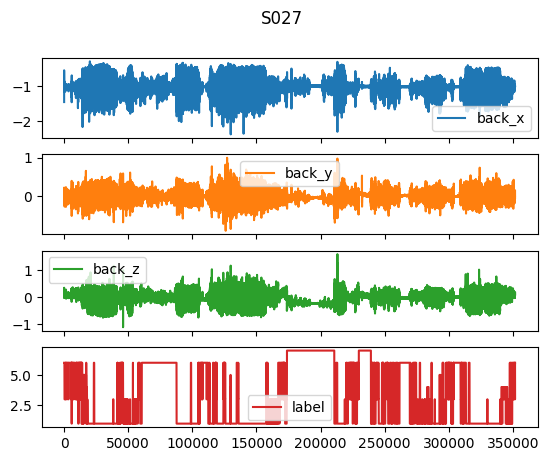

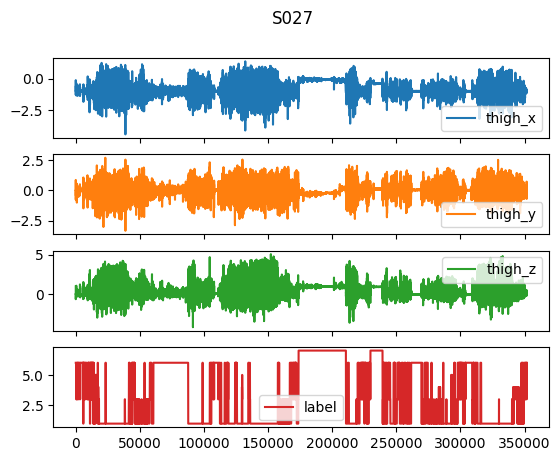

In [8]:
# Δημιουργία γραφημάτων
df = pd.read_csv(os.path.join('harth/', file_list[3]))
df[['back_x','back_y', 'back_z', 'label']].plot(title= 'S027', subplots=True)
ptl.show()
df[['thigh_x','thigh_y', 'thigh_z', 'label']].plot(title= 'S027', subplots=True)
ptl.show()